In [110]:
import pandas as pd

In [111]:
data  = pd.read_csv('requirements.csv')

In [112]:
data.head()

,package,requirement,package_name,package_version
0,02exercicio-1.0.0,NaN,02exercicio,1.0.0
1,0x10c-asm-0.0.2,NaN,0x10c-asm,0.0.2
2,115wangpan-0.7.6,beautifulsoup4,115wangpan,0.7.6
3,115wangpan-0.7.6,homura,115wangpan,0.7.6
4,115wangpan-0.7.6,humanize,115wangpan,0.7.6


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110104 entries, 0 to 110103
Data columns (total 4 columns):
package            110104 non-null object
requirement        73773 non-null object
package_name       108871 non-null object
package_version    108872 non-null object
dtypes: object(4)
memory usage: 3.4+ MB


In [114]:
data.requirement.dropna(inplace = True)

In [115]:
data.package_name.dropna(inplace = True)

In [116]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
import numpy as np

In [118]:
file = nx.from_pandas_edgelist(data, 
                            source='package_name',
                            target='requirement'
                             )

In [119]:
nx.info(file)

'Name: \nType: Graph\nNumber of nodes: 43022\nNumber of edges: 69657\nAverage degree:   3.2382'

In [120]:
file  = nx.DiGraph(file)

In [74]:
degree = dict(nx.degree(file))
max_degree = max(degree.values())
max_degree

6160

In [75]:
import seaborn as sns


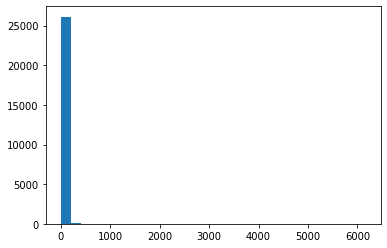

In [76]:
h = plt.hist(degree.values(), bins = 30)

Let's look at the subnetwork of the key characters

In [77]:
import operator
def centrality_measure(dic):
    return sorted(dic.items(), key = operator.itemgetter(1))

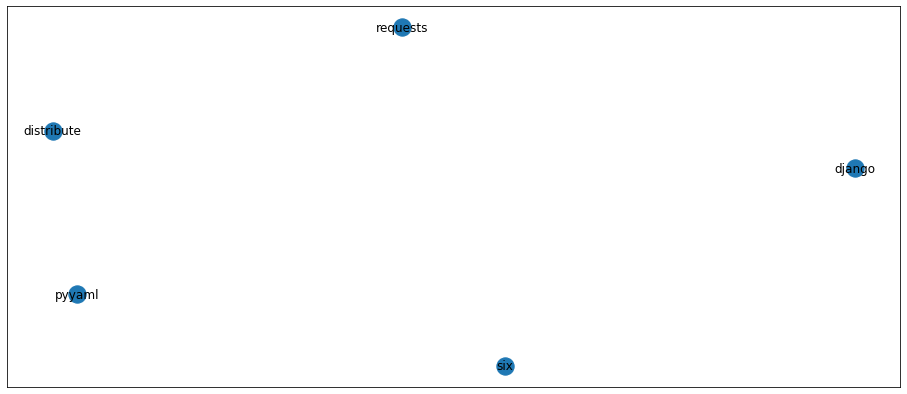

In [98]:
degree_cent = nx.degree_centrality(file)
degree_sort = centrality_measure(degree_cent)
degree_sort[-10:]

#Graph
data = [n[0] for n in degree_sort[-5:]]
sub = file.subgraph(data)
plt.figure(figsize = (16,7))
nx.draw_networkx(sub, pos = nx.spring_layout(sub))
# plt.figure(figsize = (16,7))
plt.show()

# nx.draw_networkx_labels?

In [122]:
   

to_remove = [n for n in file if file.degree(n) <= 0]
file.remove_nodes_from(to_remove)

In [123]:
nx.info(file)

'Name: \nType: DiGraph\nNumber of nodes: 43022\nNumber of edges: 139313\nAverage in degree:   3.2382\nAverage out degree:   3.2382'

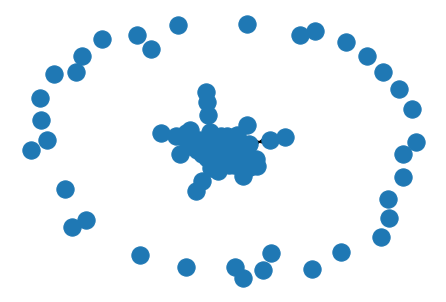

In [129]:
#No. of incoming connections
#in_degree_centrality
in_degree_cent = nx.in_degree_centrality(file)
in_degree_sort = centrality_measure(in_degree_cent)
in_degree_sort[-20:]

# Network graph of the above higest in_degree_centrality 
in_degree_graph = [n[0] for n in in_degree_sort[-100:]]
sub2 = file.subgraph(in_degree_graph)
nx.draw(sub2)

In [135]:
in_degree_sort[1][0]

'0x10c-asm'

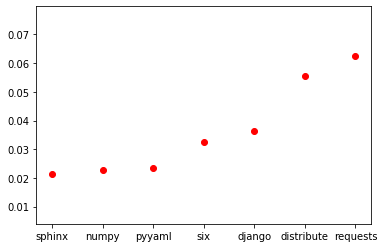

In [143]:
x = [n[0] for n in in_degree_sort[-7:]]
y = [n[1] for n in in_degree_sort[-7:]]
plt.scatter(x=x, y= y, c= 'red')

<BarContainer object of 7 artists>

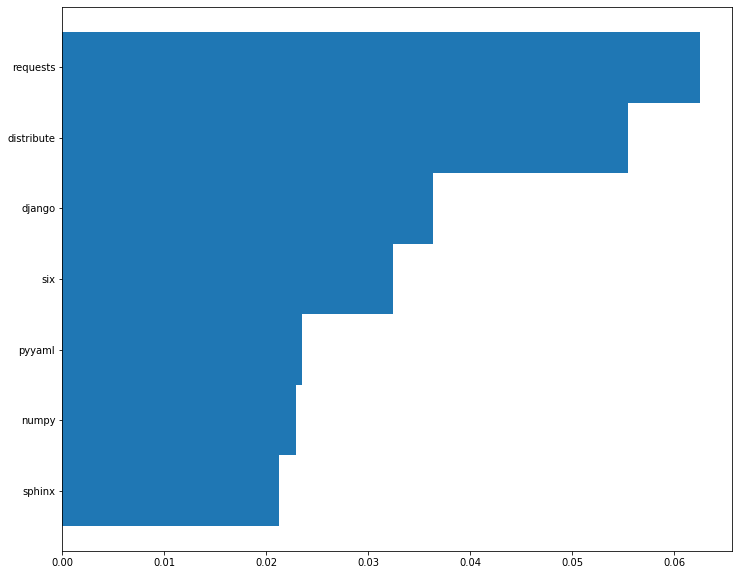

In [147]:
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax.barh(x, y ,height= 1)

In [8]:
### Finding the sorted list  based on the degree of the nodes

In [9]:
import operator

In [23]:
def centrality_degree(dic):
    return sorted(dic.items(), key = operator.itemgetter(1))
# sorted_x = sorted(x.items(), key=operator.itemgetter(0))

In [20]:
dic = nx.degree_centrality(file)



In [73]:
dd = centrality_degree(dic)
df = [node[0] for node in dd[-20:]]

NameError: name 'centrality_degree' is not defined

In [44]:
sub = file.subgraph(df)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


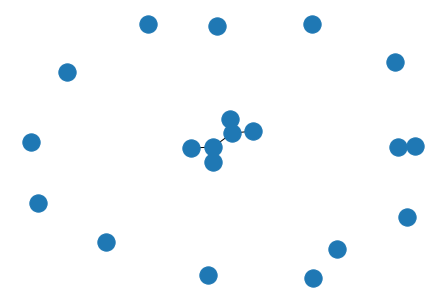

In [45]:
nx.draw(sub)